# Ciencia de Datos - TP5

## Integrantes

- Ambroa, Nicolás - 229/13 - ambroanicolas@hotmail.com
- Gaustein, Diego - 586/09 - diego@gaustein.com.ar

## 1) Implementación
Implemente el modelo en pymc3 para los priors Beta(1,1) y Beta(100,100), y grafique las posteriors
resultantes de observar 6 caras de 6 tiradas.

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:00<00:00, 2105.46it/s]


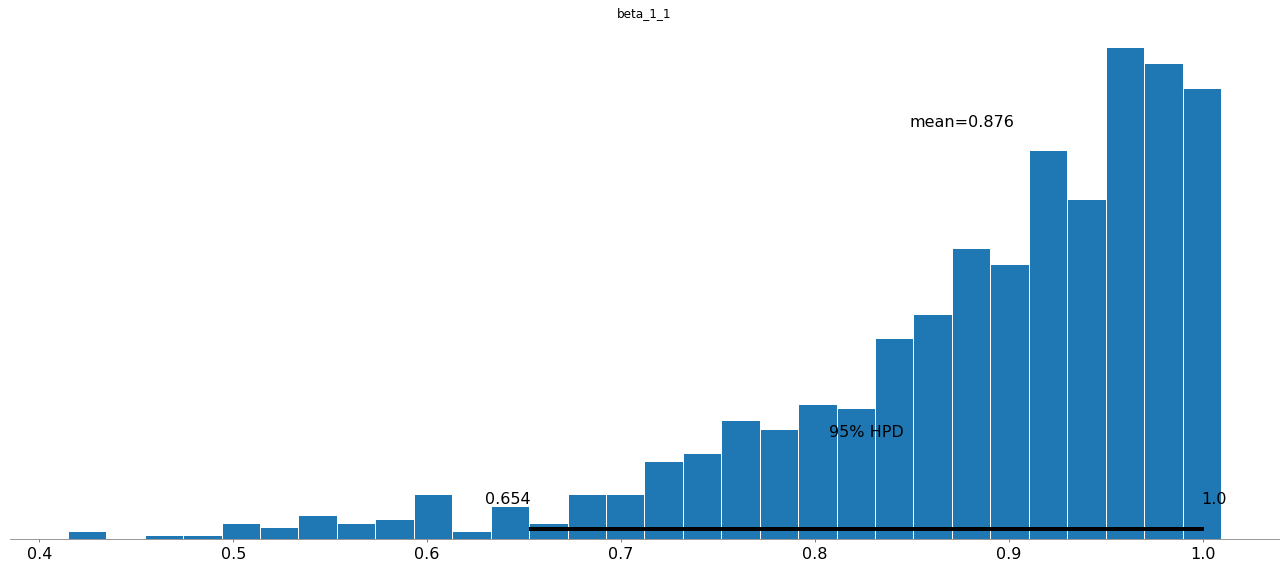

In [67]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import beta
%matplotlib inline
plt.rcParams["figure.figsize"] = (18, 8)
random.seed(42)

# Cálculos para Beta (1,1)
model_beta_1_1 = pm.Model()
with model_beta_1_1:
    beta_1_1 = pm.Beta('beta_1_1', 1, 1)
    likelihood = pm.Binomial('likelihood', n=6, p=beta_1_1, observed=6) # Binomial con #tiradas, prior y #exitos.
    trace = pm.sample(1000, progressbar=True, random_seed=123)
    pm.plot_posterior(trace)

    

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:00<00:00, 2187.56it/s]


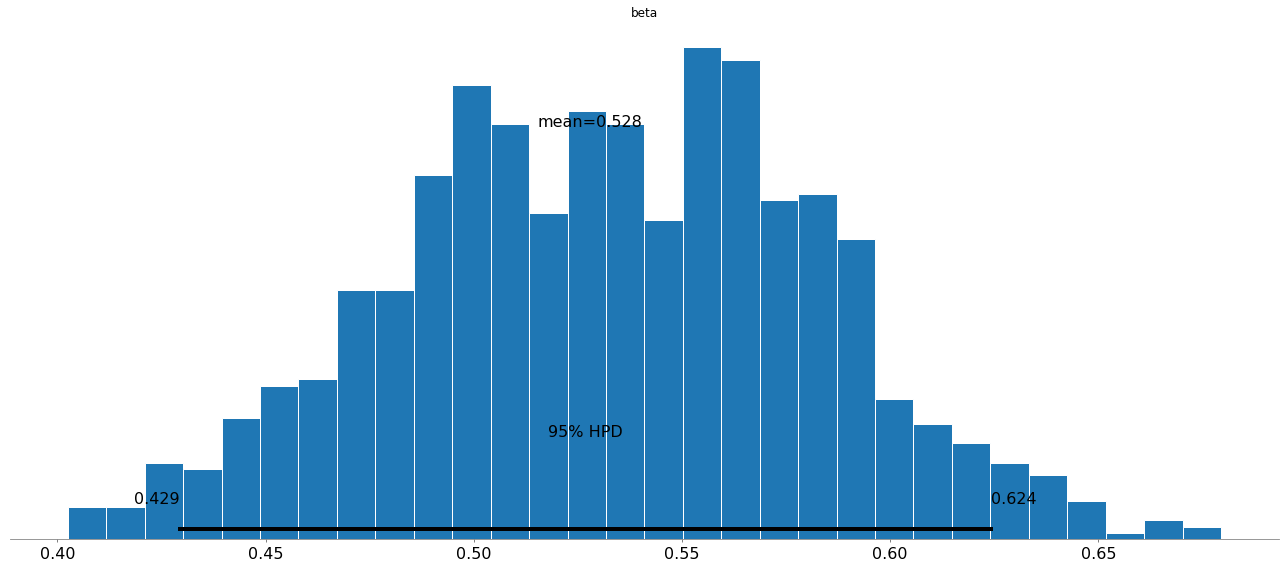

In [68]:
model_beta_100_100 = pm.Model()
with model_beta_100_100:
    beta = pm.Beta('beta', alpha=50, beta=50)
    likelihood = pm.Binomial('likelihood', n=6, p=beta, observed=6) # Binomial con #tiradas, prior y #exitos
    trace = pm.sample(1000, progressbar=True, random_seed=123)
    pm.plot_posterior(trace)

## 2. Resúmenes
Calcule el MAP (máximo a posteriori) y las medias de ambas posteriors.

In [72]:
# Cálculos para Beta(1,1)
with model_beta_1_1:
    MAP = pm.find_MAP()
    trace = pm.sample(1000, progressbar=True, random_seed=123)
    print("El MAP y la media del modelo Beta(1,1) son: {}, {}".format(MAP['beta_1_1'], np.mean(trace['beta_1_1'])))

# Cálculos para Beta(100,100)
with model_beta_100_100:
    MAP = pm.find_MAP()
    trace = pm.sample(1000, progressbar=True, random_seed=123)
    print("El MAP y la media del modelo Beta(100,100) son: {}, {}".format(MAP['beta'], np.mean(trace['beta'])))


logp = -0.0023631, ||grad|| = 0.0023627: 100%|██████████| 20/20 [00:00<00:00, 2118.71it/s]  
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:00<00:00, 2070.57it/s]


El MAP y la media del modelo Beta(1,1) son: 0.9999984620831801, 0.8728415107859996


logp = -2.0846, ||grad|| = 3: 100%|██████████| 6/6 [00:00<00:00, 1778.50it/s]
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:00<00:00, 2129.21it/s]

El MAP y la media del modelo Beta(100,100) son: 0.5288461537406147, 0.5262080306980919


## Predicción

Prediga, para ambos priors, el resultado de una nueva tirada de moneda.

In [85]:
# Cálculos para Beta(1,1)
with model_beta_1_1:
    trace = pm.sample(1000, progressbar=True, random_seed=123)
    ppc = pm.sample_ppc(trace, samples=1, model=model_beta_1_1, size=1) # Genera un nuevo experimento (6 Tiradas)
    print(ppc['likelihood'][0])

with model_beta_100_100:
    trace = pm.sample(1000, progressbar=True, random_seed=123)
    ppc = pm.sample_ppc(trace, samples=1, model=model_beta_100_100, size=1) # Genera un nuevo experimento (6 Tiradas)
    print(ppc['likelihood'][0])


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1/1 [00:00<00:00, 1958.13it/s]
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...


[6]


100%|██████████| 1/1 [00:00<00:00, 2522.13it/s]

[3]
